In [1]:
import torch
from torch.utils.data import DataLoader
from config.config import Config
from data.data_generation import generate_data
from dataset.dataset import GWSignalDataset
#from model.mymodel import MaskedConditionalAutoencoder
from model.mymodel_2 import MaskedConditionalGapFiller
from trainer.trainer import train_the_model
from utils.visualization import visualize_waveform
from utils.normalize import normalize
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import numpy as np
from utils.mask import generate_continuous_mask
from utils.wavelet import wavelet_bandpass
from utils.segment import segment_signal
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# def estimate_physical_parameters(signal):
#     """
#     估计信号的物理参数，例如频率、相位和振幅。
#     这是一个简单的示例实现，具体实现应根据你的需求进行调整。
#     """
#     # 假设信号是一个简单的正弦波，我们可以估计它的幅度、频率和相位
#     amplitude = signal.abs().max().item()  # 估计振幅
#     frequency = torch.fft.fftfreq(signal.size(0)).abs().argmax().item()  # 估计频率
#     phase = torch.atan2(signal[1], signal[0]).item()  # 估计相位

#     return [amplitude, frequency, phase]
 



 

# 生成训练集数据
#freq_ifft = np.arange(Config.f_in,Config.fout,Config.f_step)

signal_length=Config.signal_length
gap_size = signal_length//Config.signal_to_gap_length_ratio


data = np.load('data/signal_data.npz')
#data = np.load('data/test_signal_data.npz')
signals = data['signals']
conditions = data['conditions']
#signal,condition=generate_data(1)
# signals=[]
# signal=signal.transpose(0,1)
# print(signal.shape)
# for _ in range(Config.num_samples):
    
#     signals.append(signal)

# #masked_signals = data['masked_signals']

# conditions=[]
# print(condition.shape)
# condition=condition.transpose(1,0)
# for _ in range(Config.num_samples):
    
#     conditions.append(condition)


#数据预处理
#n_signals,mean,std=normalize(signals)
signals = torch.tensor(signals, dtype=torch.float32)
masks = generate_continuous_mask(signals.size(0), signal_length, gap_size)
masked_signals = []
signals_copy=signals
signals,_,_=normalize(signals)
for i in range(signals_copy.size(0)):
    masked_signal = np.copy(signals_copy[i])
    masked_signal[~masks[i].numpy()] = 0  # 将掩码位置的信号置为0
    masked_signals.append(masked_signal)
masked_signals,_,_=normalize(masked_signals)
processed_signals = []
processed_masked_signals = []

i=0
for signal, masked_signal in zip(signals, masked_signals):
    # 对原始信号进行小波变换和分段
    transformed_signal = wavelet_bandpass(signal)
    segmented_signal = segment_signal(transformed_signal)

    # 对掩码信号进行小波变换和分段
    transformed_masked_signal = wavelet_bandpass(masked_signal)
    segmented_masked_signal = segment_signal(transformed_masked_signal)

    processed_signals.append(segmented_signal)
    processed_masked_signals.append(segmented_masked_signal)
    print(i)
    i+=1
print(1)
dataset = GWSignalDataset(signals,processed_signals,processed_masked_signals, conditions)








/home/ljq/miniconda3/envs/few_env/lib/python3.12/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS
/home/ljq/code/Ringdown_gap_filling/Proj/utils/normalize.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  signal=torch.tensor(signal)
/home/ljq/code/Ringdown_g

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
import torch



# 保存 dataset
torch.save(dataset, '/home/ljq/code/Ringdown_gap_filling/Proj/dataset/train_dataset_noise.pth')
import torch
from torch.utils.data import DataLoader
from config.config import Config
from data.data_generation import generate_data
from dataset.dataset import GWSignalDataset
#from model.mymodel import MaskedConditionalAutoencoder
from model.mymodel_2 import MaskedConditionalGapFiller
from trainer.trainer import train_the_model
from utils.visualization import visualize_waveform
from utils.normalize import normalize
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import numpy as np
from utils.mask import generate_continuous_mask
from utils.wavelet import wavelet_bandpass
from utils.segment import segment_signal
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#dataset=new_dataset
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = Config.batch_size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 获取一个批次的数据
targets,_,inputs, conditions = next(iter(train_loader))

In [12]:
print(targets,inputs)

tensor([[ 1.3129,  1.3113,  1.3022,  ...,  1.3159, -1.3007,  1.3159],
        [ 0.6332,  0.6154,  0.4150,  ...,  0.5576, -0.7763,  0.5575],
        [-0.6404, -0.6180, -0.4095,  ..., -0.5690,  0.7787, -0.5689],
        ...,
        [ 0.6491,  0.6418,  0.5382,  ...,  0.6116, -0.7155,  0.6116],
        [-0.0459, -0.0398,  0.0466,  ..., -0.0111,  0.1112, -0.0110],
        [-1.7043, -1.7188, -1.8784,  ..., -1.7725,  1.5623, -1.7726]]) tensor([[[[ 1.1400e-01, -7.9621e-02, -1.3236e-02,  ...,  1.9255e-03,
            5.1799e-04, -2.0434e-03],
          [ 4.9481e-03,  1.0046e-03, -4.0662e-03,  ...,  4.4488e-03,
           -5.4443e-03, -4.4792e-03],
          [-4.0091e-04,  2.1994e-03,  3.2954e-04,  ..., -1.4310e-02,
           -2.5209e-03,  1.5454e-02],
          ...,
          [-4.0365e-07,  8.5965e-08, -3.5920e-08,  ...,  2.4905e-07,
           -4.2534e-07,  4.5215e-07],
          [-1.7806e-07,  1.0563e-07, -1.9007e-07,  ...,  1.9350e-07,
           -2.6124e-07,  5.3249e-07],
          [-1.96

In [ ]:


#打印形状
# print(f'Inputs shape: {inputs.shape}')  
# print(f'Targets shape: {targets.shape}')  
# print(f'Conditions shape: {conditions.shape}')  

import matplotlib.pyplot as plt

# 可视化第一个批次中的前几个样本
# num_samples_to_plot = 3  # 要绘制的样本数量
# for i in range(num_samples_to_plot):
#     plt.figure(figsize=(10, 4))
#     plt.plot(inputs[i].cpu().numpy(), label='Input (Masked)')
#     plt.plot(targets[i].cpu().numpy(), label='Target (Original)')
#     plt.title(f'Sample {i+1}')
#     plt.xlabel('Time Step')
#     plt.ylabel('Signal Value')
#     plt.legend()
#     plt.show()

# 定义模型  
model = MaskedConditionalGapFiller().to(device)
train_the_model(
    model,
    train_loader,
    val_loader,
    num_epochs=Config.num_epochs,
    learning_rate=Config.learning_rate,
    save_path=Config.model_save_path,
    device=device,
    save_freq=10
)


/home/ljq/miniconda3/envs/few_env/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


200
Epoch [1/200], Training Loss: 62.3542, Validation Loss: 64.7548
Epoch [2/200], Training Loss: 62.2690, Validation Loss: 64.4954
Epoch [3/200], Training Loss: 62.2522, Validation Loss: 64.4824
Epoch [4/200], Training Loss: 62.2440, Validation Loss: 64.4837
Epoch [5/200], Training Loss: 62.2410, Validation Loss: 64.4807
Epoch [6/200], Training Loss: 62.2324, Validation Loss: 64.4796
Epoch [7/200], Training Loss: 62.2320, Validation Loss: 64.4847
Epoch [8/200], Training Loss: 62.2323, Validation Loss: 64.4845
Epoch [9/200], Training Loss: 62.2288, Validation Loss: 64.4800
Epoch [10/200], Training Loss: 62.2268, Validation Loss: 64.4795
Model saved to ./saved_models/No_noise/model2_epoch_10
Epoch [11/200], Training Loss: 62.2264, Validation Loss: 64.4732
Epoch [12/200], Training Loss: 62.2267, Validation Loss: 64.4727
Epoch [13/200], Training Loss: 62.2247, Validation Loss: 64.4725
Epoch [14/200], Training Loss: 62.2225, Validation Loss: 64.4770
Epoch [15/200], Training Loss: 62.2234, 

In [7]:
import numpy as np
from config.config import Config
import os
import sys
sys.path.append('/home/ljq/code/Ringdown_gap_filling/Proj')
from data.waveform import *
from data.ringdown_waveform import Gap_dir as Ga
import torch
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
from utils.psd import PSD_Lisa_no_Response
from utils.noise import fftfilt, stat_gauss_noise,generate_noise_from_psd
from scipy.fftpack import fft, ifft
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import firwin2,welch
import os
# def rotate_list(lst, position=2):
#     index = len(lst) // position
#     return lst[index:] + lst[:index]
SAVE_PATH_1= 'data/signal_data.npz'
SAVE_PATH_2 = 'data/signal_test_data.npz'
TEMP_DIR_1 = 'data/temp_files'
TEMP_DIR_2 = 'data/temp_files2'
os.makedirs(TEMP_DIR_1, exist_ok=True)  # 创建临时文件目录
scale=Config.scale
samp_freq=Config.samp_freq
N=round(samp_freq/Config.f_step)
time_vec=1/samp_freq*np.arange(0,N,1)
def generate_single_data(i):
    # 生成单个数据的代码
    Mtot = np.random.uniform(Config.parameters[0], Config.parameters[1])
    M_ratio = np.random.uniform(Config.parameters[2], Config.parameters[3])
    R_shift = np.random.uniform(Config.parameters[4], Config.parameters[5])
    signal_length = Config.signal_length

    para = [Mtot, M_ratio, R_shift]
    freq_ifft = np.arange(Config.f_in, Config.f_out, Config.f_step)
    f_sf = sf(freq_ifft, para, para_dw, para_dtau)
    st = Ga.Freq_ifft(f_sf)
    original_signal = st[:signal_length]
    original_signal = torch.tensor(original_signal, dtype=torch.float32)
    original_signal = torch.real(original_signal)
    return original_signal, torch.tensor([Mtot, M_ratio, R_shift], dtype=torch.float32)

def generate_data(num_samples,TEMP_DIR=TEMP_DIR_1, SAVE_PATH=SAVE_PATH_1):
   
    """生成指定数量的样本数据，支持断点续传
    
    Args:
        num_samples: 需要生成的总样本数量
        
    Returns:
        Tuple: (signals, conditions) 全部样本数据
    """
    # 1. 初始化临时目录
    os.makedirs(TEMP_DIR, exist_ok=True)
    
    # 2. 准确计算已有样本数（忽略非样本文件）
    existing_samples = len([
        f for f in os.listdir(TEMP_DIR) 
        if f.startswith('sample_') and f.endswith('.npz')
    ])
    
    # 3. 计算需要生成的数量
    start_index = existing_samples
    remaining_samples = max(0, num_samples - start_index)
    
    # 4. 显示进度信息
    print(f"当前进度: {start_index}/{num_samples} | 待生成: {remaining_samples}")

    # 5. 生成缺失样本
    if remaining_samples > 0:
        try:
            with Pool(cpu_count()) as pool:
                results = tqdm(
                    pool.imap_unordered(generate_single_data, range(start_index, num_samples)),
                    total=remaining_samples,
                    desc="生成样本"
                )
                
                for i, (signal, condition) in enumerate(results):
                    # 6. 实时保存每个样本
                    np.savez(
                        os.path.join(TEMP_DIR, f'sample_{start_index + i}.npz'),
                        signal=signal.numpy(),
                        condition=condition.numpy()
                    )
        except Exception as e:
            print(f"生成过程中出错: {str(e)}")
            raise RuntimeError("数据生成失败，请检查参数设置")
    
    # 7. 返回当前内存中的所有数据（可选）
    # 注意：对于大数据集建议使用 combine_data() 单独处理
    return combine_data(TEMP_DIR=TEMP_DIR, SAVE_PATH=SAVE_PATH)  # 或者 return None 仅执行生成操作

def combine_data(TEMP_DIR=TEMP_DIR_1, SAVE_PATH=SAVE_PATH_1):
    """合并所有样本数据并返回完整数据集"""
    try:
        # 获取并按序号排序样本文件
        sample_files = sorted(
            [f for f in os.listdir(TEMP_DIR) if f.startswith('sample_') and f.endswith('.npz')],
            key=lambda x: int(x.split('_')[1].split('.')[0])
        )
        
        if not sample_files:
            raise ValueError("未找到任何样本文件")
        
        signals, conditions = [], []
        for f in tqdm(sample_files, desc="加载样本"):
            data = np.load(os.path.join(TEMP_DIR, f))
            signals.append(torch.tensor(data['signal']))
            conditions.append(torch.tensor(data['condition']))
        
        # 合并数据
        signals = torch.stack(signals)
        conditions = torch.stack(conditions)
        
        # 保存完整数据集
        np.savez(SAVE_PATH, signals=signals.numpy(), conditions=conditions.numpy())
        print(f"已合并 {len(signals)} 个样本到 {SAVE_PATH}")
        
        return signals, conditions
        
    except Exception as e:
        print(f"合并数据时出错: {str(e)}")
        raise

In [8]:
import torch
from config.config import Config
from utils.mask import generate_continuous_mask
import torch
from torch.utils.data import DataLoader
from config.config import Config
#from data.data_generation import generate_data
from dataset.dataset import GWSignalDataset
#from model.mymodel import MaskedConditionalAutoencoder
from model.mymodel_2 import MaskedConditionalGapFiller
from trainer.trainer import train_the_model
from utils.visualization import visualize_waveform
from utils.normalize import normalize
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 测试阶段

# def estimate_physical_parameters(signal):
signal_length=Config.signal_length
gap_size = signal_length//Config.signal_to_gap_length_ratio
model = MaskedConditionalGapFiller().to(device)
#model_path = '/home/ljq/code/Ringdown_gap_filling/Proj/saved_models/model.pth'
model.load_state_dict(torch.load('./saved_models/No_noise/model2_epoch_20.pth'))

# 切换到评估模式
model.eval()

test_num=50
SAVE_PATH_1= 'data/signal_data.npz'
SAVE_PATH_2 = 'data/signal_test_data.npz'
TEMP_DIR_1 = 'data/temp_files'
TEMP_DIR_2 = 'data/temp_files2'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

test_signals,  test_conditions = generate_data(
        num_samples=test_num,TEMP_DIR=TEMP_DIR_2,SAVE_PATH=SAVE_PATH_2
    )
test_signals[0]=torch.zeros(signal_length)
print(test_signals.shape)
masks=generate_continuous_mask(test_num,signal_length,gap_size)

#n_test_signals,mean_t,std_t=normalize(test_signals)
test_signals_copy=test_signals
test_masked_signals_copy=[]
for i in range(test_signals_copy.size(0)):
    test_masked_signal_copy = np.copy(test_signals_copy[i])
    test_masked_signal_copy[~masks[i].numpy()] = 0  # 将掩码位置的信号置为0
    test_masked_signals_copy.append(test_masked_signal_copy)
test_signals,mean0,std0=normalize(test_signals)

当前进度: 50/50 | 待生成: 0


加载样本: 100%|██████████| 50/50 [00:00<00:00, 4047.23it/s]

已合并 50 个样本到 data/signal_test_data.npz
torch.Size([50, 1056])


In [9]:
from utils.wavelet import wavelet_bandpass
from utils.segment import segment_signal

test_masked_signals=[]
for i in range(test_signals_copy.size(0)):
    test_masked_signal = np.copy(test_signals_copy[i])
    test_masked_signal[~masks[i].numpy()] = 0  # 将掩码位置的信号置为0
    test_masked_signals.append(test_masked_signal)
test_masked_signals,mean,std=normalize(test_masked_signals)
processed_test_signals = []
processed_test_masked_signals = []

for signal, masked_signal in zip(test_signals, test_masked_signals):
    # 对原始信号进行小波变换和分段
    transformed_signal = wavelet_bandpass(signal)
    segmented_signal = segment_signal(transformed_signal)

    # 对掩码信号进行小波变换和分段
    transformed_masked_signal = wavelet_bandpass(masked_signal)
    segmented_masked_signal = segment_signal(transformed_masked_signal)

    processed_test_signals.append(segmented_signal)
    processed_test_masked_signals.append(segmented_masked_signal)

# 转换为张量
processed_test_signals_tensor = torch.tensor(processed_test_signals, dtype=torch.float32).to(device)
processed_test_masked_signals_tensor = torch.tensor(processed_test_masked_signals, dtype=torch.float32).to(device)

<class 'numpy.ndarray'>


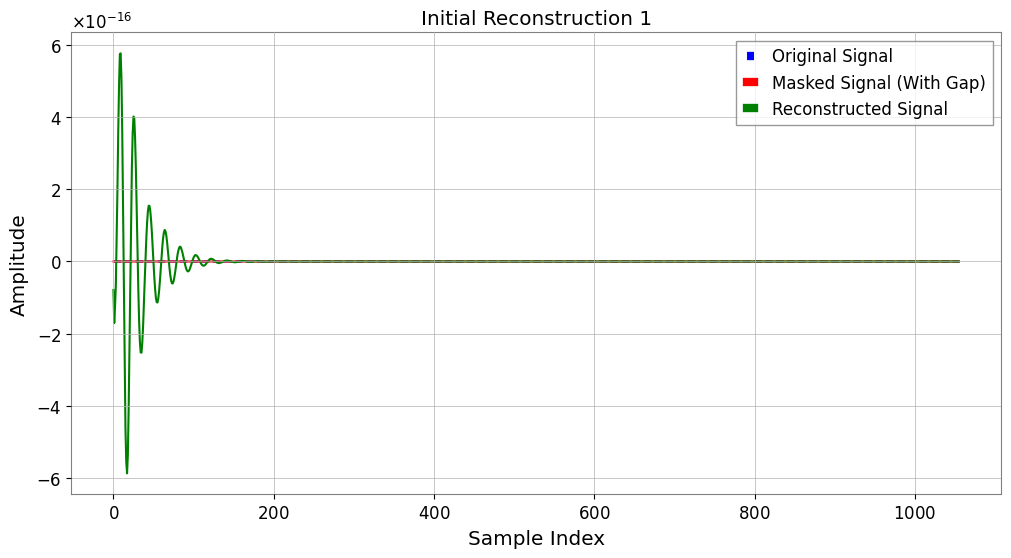

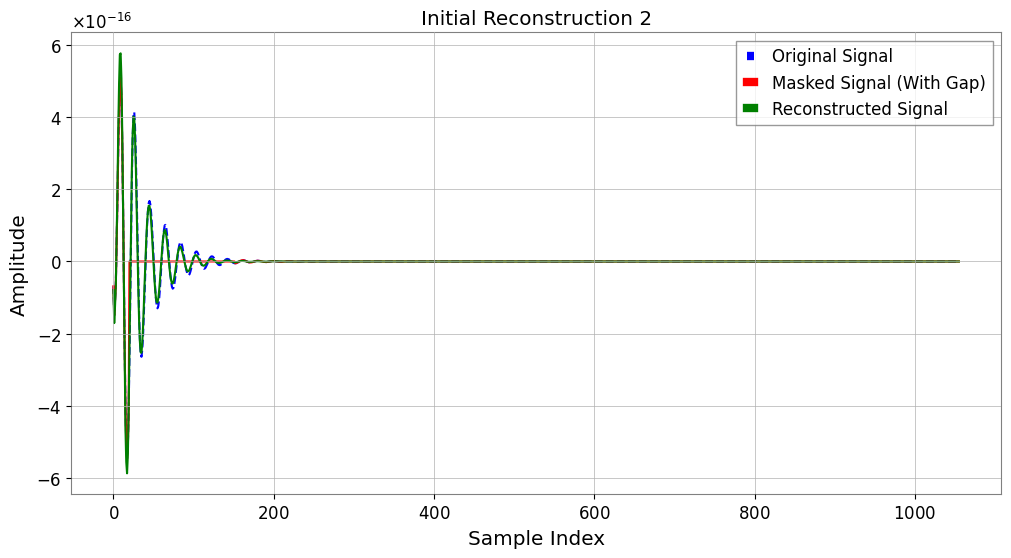

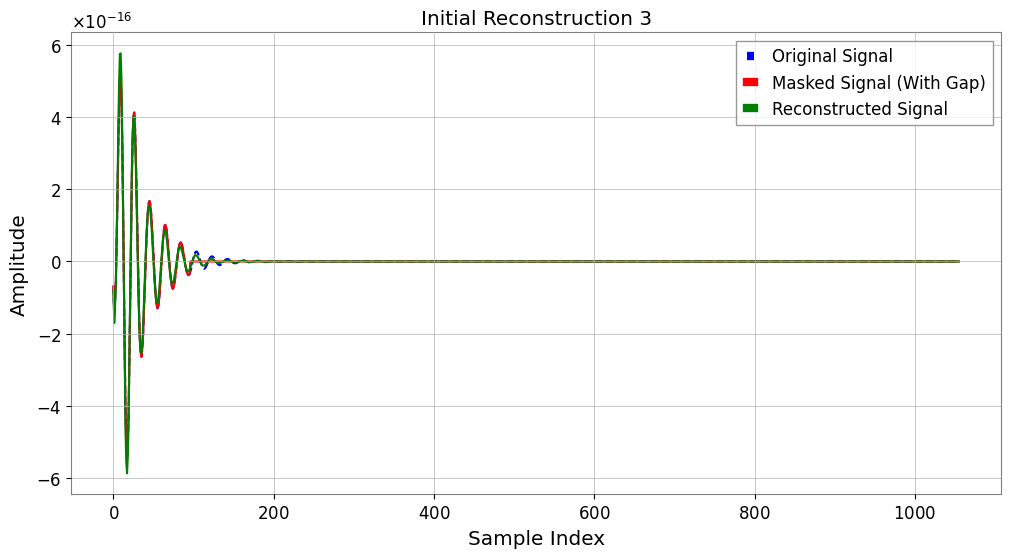

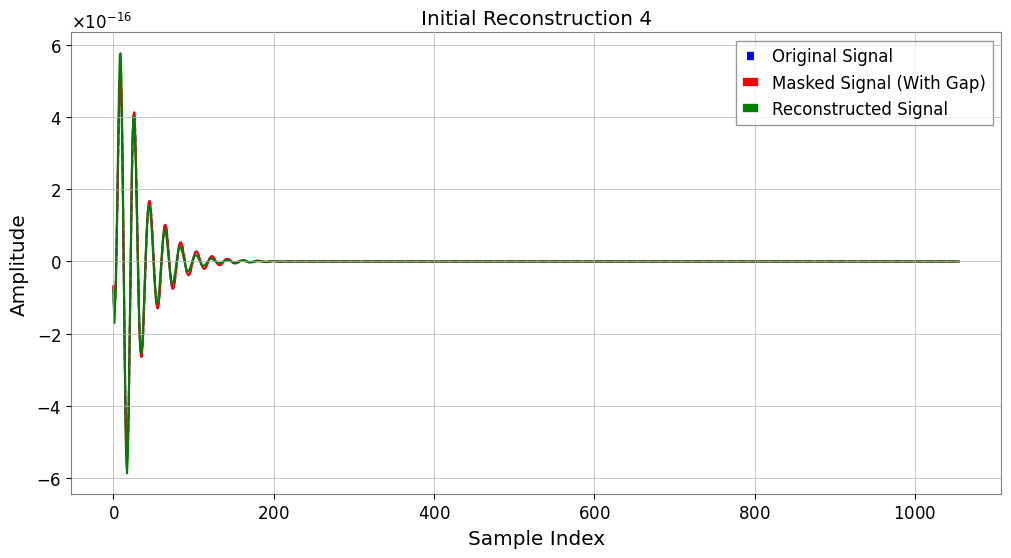

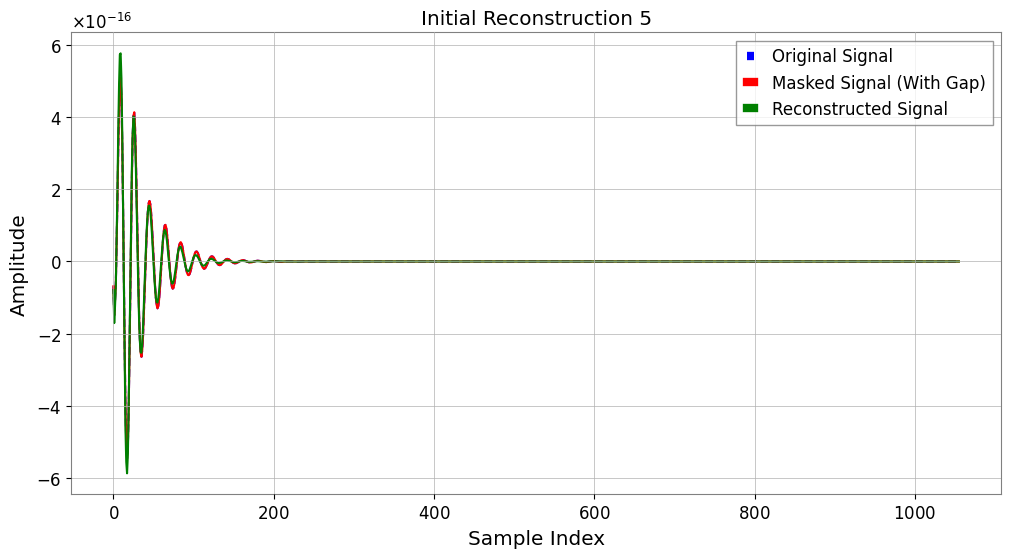

[-7.8922507e-17 -1.7046247e-16 -1.2343074e-16 ... -1.9960705e-20
  9.8113540e-21 -1.9626216e-20]


In [10]:

with torch.no_grad():
    reconstructed_signals_tensor = model(processed_test_masked_signals_tensor)
#    initial_reconstructed_signals = mean_t+std_t*reconstructed_signals_tensor.cpu().squeeze(-1).numpy()
# for i in range(5):
#     print(f"Signal {i}:")
#     print("Original signal contains NaN:", torch.isnan(torch.tensor(n_test_signals[i])).any())
#     print("Masked signal contains NaN:", torch.isnan(torch.tensor(masked_test_signals_tensor.cpu().numpy()[i])).any())
#     print("Reconstructed signal contains NaN:", torch.isnan(torch.tensor(initial_reconstructed_signals[i])).any())

#     print("Original signal contains Inf:", torch.isinf(torch.tensor(n_test_signals[i])).any())
#     print("Masked signal contains Inf:", torch.isinf(torch.tensor(masked_test_signals_tensor.cpu().numpy()[i])).any())
#     print("Reconstructed signal contains Inf:", torch.isinf(torch.tensor(initial_reconstructed_signals[i])).any())

#     # 如果没有NaN或者Inf，才进行可视化
#     if not (torch.isnan(torch.tensor(n_test_signals[i])).any() or
#             torch.isnan(torch.tensor(masked_test_signals_tensor.cpu().numpy()[i])).any() or
#             torch.isnan(torch.tensor(initial_reconstructed_signals[i])).any() or
#             torch.isinf(torch.tensor(n_test_signals[i])).any() or
#             torch.isinf(torch.tensor(masked_test_signals_tensor.cpu().numpy()[i])).any() or
#             torch.isinf(torch.tensor(initial_reconstructed_signals[i])).any()):
#         visualize_waveform(
#             n_test_signals[i],
#             masked_test_signals_tensor.cpu().numpy()[i],
#             initial_reconstructed_signals[i],
#             title=f'Initial Reconstruction {i+1}'
#         )
#     else:
#         print(f"Signal {i} contains NaN or Inf, skipping visualization.")
# for i in range(5):
#     print(f"Signal {i}:")
#     print(f"Original signal min: {n_test_signals[i].min()}, max: {n_test_signals[i].max()}")
#     print(f"Masked signal min: {masked_test_signals_tensor.cpu().numpy()[i].min()}, max: {masked_test_signals_tensor.cpu().numpy()[i].max()}")
#     print(f"Reconstructed signal min: {initial_reconstructed_signals[i].min()}, max: {initial_reconstructed_signals[i].max()}")
#print(masks.size(),test_signals.size())
#test_masked_signals=masks.cpu().numpy()*test_signals.cpu().numpy()
#print(masked_test_signals)
# 可视化初步复原结果
std=std.cpu().numpy()
mean=mean.cpu().numpy()
print(type(test_signals.cpu().numpy()))
for i in range(5):
    visualize_waveform(
        (test_signals_copy[i].cpu().numpy() ),
        test_masked_signals_copy[i],
        reconstructed_signals_tensor.cpu().numpy()[i][0]*std+mean,
        title=f'Initial Reconstruction {i+1}'
        )
print(reconstructed_signals_tensor.cpu().numpy()[0][0]*std+mean-test_signals_copy[0].numpy())
# 参数估计
estimated_conditions = []
for i in range(reconstructed_signals_tensor.size(0)):
    estimated_params = test_conditions[i]
    estimated_conditions.append(estimated_params)
#estimated_conditions_tensor = torch.tensor(estimated_conditions, dtype=torch.float32).to(device)
estimated_conditions_tensor = torch.tensor(np.array(estimated_conditions), dtype=torch.float32).to(device)

# # 第二次复原：使用估计的条件输入
# with torch.no_grad():
#     final_reconstructed_signals_tensor = model(
#         test_signals_tensor,
#         masks,
#         estimated_conditions_tensor,  # 使用估计的条件输入
#         gap_start
#         )
#     final_reconstructed_signals = final_reconstructed_signals_tensor.cpu().squeeze(-1).numpy()
#     final_reconstructed_signals= std_t*final_reconstructed_signals+mean_t
# # 可视化最终复原结果
# for i in range(5):
#     visualize_waveform(
#         test_signals[i],
#         masked_test_signals[i],
#         final_reconstructed_signals[i],
#         title=f'Final Reconstruction with Estimated Conditions {i+1}'
#         )